In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

import sys
sys.path.append("/home/tintin/rongheng/cv/")
from lib.image_lib import show_img

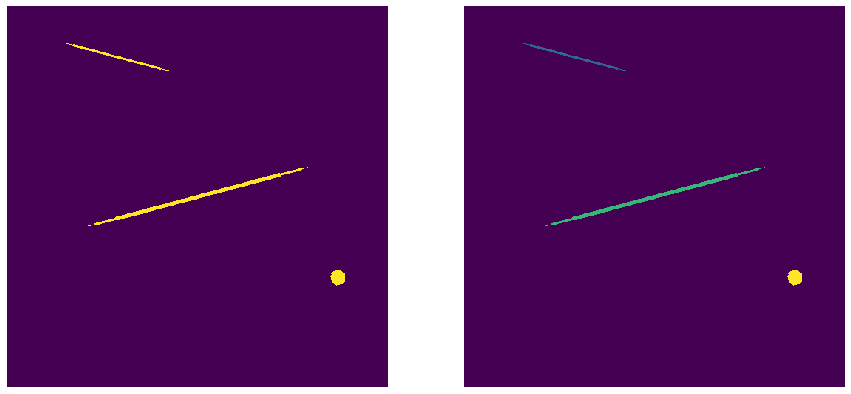

In [2]:
scrach_1 = np.zeros((500, 500))
rr, cc = ellipse(100, 100, 2, 70)
scrach_1[rr, cc] = 1
scrach_1 = rotate(scrach_1, angle=-15, order=0)


scrach_2 = np.zeros((500, 500))
rr, cc = ellipse(250, 250, 3, 150)
scrach_2[rr, cc] = 1
scrach_2 = rotate(scrach_2, angle=15, order=0)

scrach_3 = np.zeros((500, 500))
rr, cc = ellipse(400, 400, 10, 10)
scrach_3[rr, cc] = 1
scrach_3 = rotate(scrach_3, angle=15, order=0)

image = scrach_1 + scrach_2 + scrach_3

label_img = label(image)
show_img(image, label_img,size=(15,10))



/home/tintin/rongheng/cv/.env/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/home/tintin/rongheng/cv/.env/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


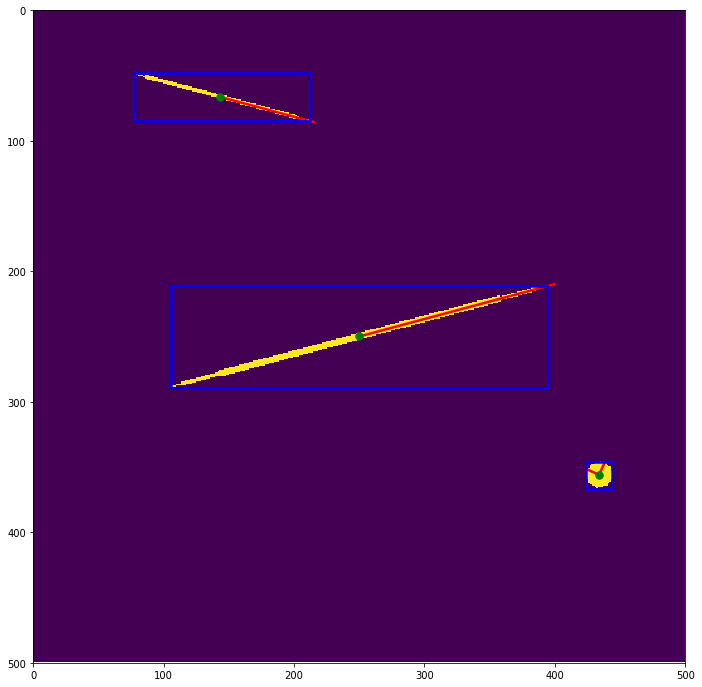

In [3]:
regions = regionprops(label_img)

fig, ax = plt.subplots(figsize=(12,12))

ax.imshow(image)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
    
ax.axis((0, 500, 500, 0))
plt.show()

In [4]:
for props in regions:
    print(props.eccentricity)

0.9997382158703829
0.9998430139325307
0.037512261090124246
